In [1]:
from Model import *
import torch.nn as nn
import pandas as pd

#get the data
data = pd.read_csv("Data/dataset.csv")
train = data['queue'].values
labels = data['label'].values
tokenized = tokenize(train)

<Axes: xlabel='label'>

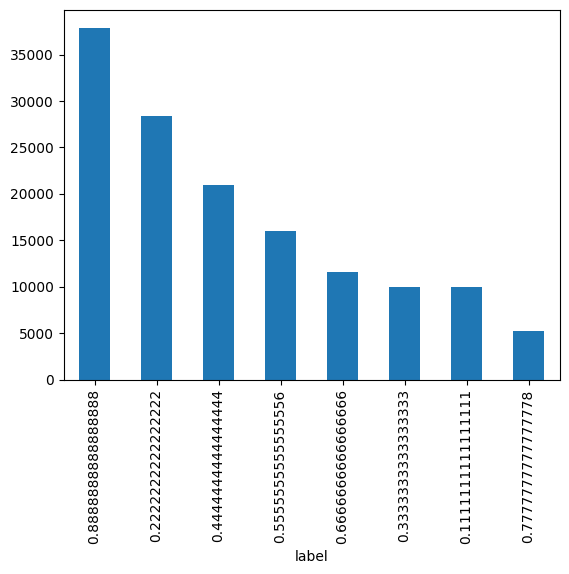

In [10]:
#plot the data frame where x is the label and y is the number of items that have that label
data['label'].value_counts().plot(kind='bar')

/var/folders/5m/5bz8j_1n6bv7tpcnz6sjyc280000gn/T/ipykernel_10815/2666751412.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'r', label='Training loss', color = "blue")
/var/folders/5m/5bz8j_1n6bv7tpcnz6sjyc280000gn/T/ipykernel_10815/2666751412.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r', label='Validation loss', color = "red")


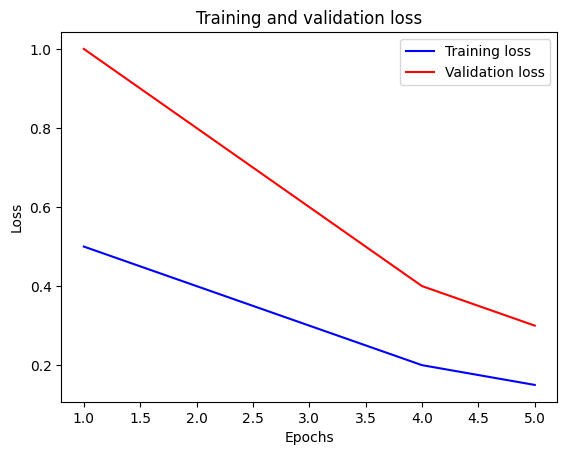

In [6]:
import matplotlib.pyplot as plt

def plot_loss(train_loss, val_loss):
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'r', label='Training loss', color = "blue")
    plt.plot(epochs, val_loss, 'r', label='Validation loss', color = "red")
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Example usage:
# Replace train_loss and val_loss with your actual data
train_loss = [0.5, 0.4, 0.3, 0.2, 0.15]
val_loss = [1.0, 0.8, 0.6, 0.4, 0.3]

plot_loss(train_loss, val_loss)


In [13]:
#model hyperparameters 
ntokens = 65536  # size of vocabulary
emsize = 240  # embedding dimension
d_hid = 240  # dimension of the feedforward network model in ``nn.TransformerEncoder``
nlayers = 12  # number of ``nn.TransformerEncoderLayer`` in ``nn.TransformerEncoder``
nhead = 12  # number of heads in ``nn.MultiheadAttention``
dropout = 0.2  # dropout probability

#define the model 
transformer = TransformerModel(ntokens, emsize, nhead, d_hid, nlayers, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(transformer.parameters())

train_losses = []
validation_losses = []

#training loop
for i in range(3):
    transformer.train()
    for j in range(1000):
        optimizer.zero_grad()
        input = tokenized[j*128:j*128+128]
        output = transformer(input)
        loss = criterion(output, torch.Tensor(labels[j*128:j*128+128]).reshape(-1, 1))

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    print("epoch finished")

tensor(2.2933, grad_fn=<MseLossBackward0>)
tensor(0.3872, grad_fn=<MseLossBackward0>)
tensor(0.3522, grad_fn=<MseLossBackward0>)
tensor(0.3598, grad_fn=<MseLossBackward0>)
tensor(0.3389, grad_fn=<MseLossBackward0>)
tensor(0.3066, grad_fn=<MseLossBackward0>)
tensor(0.3863, grad_fn=<MseLossBackward0>)
tensor(0.3288, grad_fn=<MseLossBackward0>)
tensor(0.3544, grad_fn=<MseLossBackward0>)
tensor(0.3580, grad_fn=<MseLossBackward0>)
tensor(0.3626, grad_fn=<MseLossBackward0>)
tensor(0.3581, grad_fn=<MseLossBackward0>)
tensor(0.3484, grad_fn=<MseLossBackward0>)
tensor(0.3989, grad_fn=<MseLossBackward0>)
tensor(0.3628, grad_fn=<MseLossBackward0>)
tensor(0.3616, grad_fn=<MseLossBackward0>)
tensor(0.3693, grad_fn=<MseLossBackward0>)
tensor(0.3433, grad_fn=<MseLossBackward0>)
tensor(0.3590, grad_fn=<MseLossBackward0>)
tensor(0.3275, grad_fn=<MseLossBackward0>)
tensor(0.2930, grad_fn=<MseLossBackward0>)
tensor(0.3570, grad_fn=<MseLossBackward0>)
tensor(0.3657, grad_fn=<MseLossBackward0>)
tensor(0.37

KeyboardInterrupt: 